Edgelist txt data successfully loaded into a networkx Graph!


list of degree distribution:
[(1, 21), (2, 13), (3, 11), (4, 13), (5, 11), (6, 4), (8, 1), (9, 1)]


Number of triangles:
{1: 0, 58: 0, 2: 3, 56: 3, 34: 0, 25: 3, 4: 7, 13: 7, 18: 6, 66: 6, 61: 1, 5: 6, 10: 0, 6: 3, 19: 3, 53: 3, 38: 3, 7: 7, 3: 3, 21: 0, 17: 3, 69: 7, 63: 3, 8: 1, 70: 5, 20: 2, 9: 7, 40: 0, 51: 4, 39: 5, 32: 0, 46: 1, 27: 0, 71: 2, 24: 7, 12: 3, 65: 0, 22: 0, 15: 3, 35: 4, 67: 3, 42: 0, 64: 1, 68: 0, 23: 0, 28: 0, 57: 0, 26: 0, 0: 0, 29: 0, 30: 1, 31: 3, 48: 3, 43: 3, 37: 3, 33: 7, 36: 0, 52: 0, 41: 1, 44: 0, 59: 0, 45: 1, 47: 2, 11: 1, 49: 3, 73: 2, 72: 1, 50: 0, 55: 0, 54: 0, 60: 0, 62: 0, 16: 0, 14: 0, 74: 0}


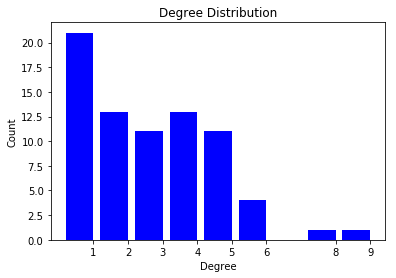

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from networkx import NetworkXError

def _triangles_and_degree_iter(G,nodes=None):
    """ Return an iterator of (node, degree, triangles).  

    This double counts triangles so you may want to divide by 2.
    See degree() and triangles() for definitions and details.

    """
    if G.is_multigraph():
        raise NetworkXError("Not defined for multigraphs.")

    if nodes is None:
        nodes_nbrs = G.adj.items()
    else:
        nodes_nbrs= ( (n,G[n]) for n in G.nbunch_iter(nodes) )

    for v,v_nbrs in nodes_nbrs:
        vs=set(v_nbrs)-set([v])
        ntriangles=0
        for w in vs:
            ws=set(G[w])-set([w])
            ntriangles+=len(vs.intersection(ws))
        yield (v,len(vs),ntriangles)

def compute_num_triangles(G, nodes=None):  # This is Prob. 3-e.
    if G.is_directed():
        raise NetworkXError("triangles() is not defined for directed graphs.")
    if nodes in G: 
        # return single value
        return next(_triangles_and_degree_iter(G,nodes))[2] // 2
    print("Number of triangles:")
    print(dict( (v,t // 2) for v,d,t in _triangles_and_degree_iter(G,nodes)))
    '''
    Compute the number of triangles.

    Finds the number of triangles that include a node as one vertex.

    Parameters
    ------------------------------------------------------------------
    G : graph
       A networkx graph
    nodes : container of nodes
       Compute triangles for nodes in this container.
    
    Returns
    ------------------------------------------------------------------
    out : dictionary
       Number of triangles keyed by node label.
       
    Notes
    -----
    When computing triangles for the entire graph each triangle is counted 
    three times, once at each node.

    '''





def degree_dist(G):  # This is Prob. 3-d.
    degree_sequence=[0 for i in range(len(G.degree()))]
    for i in range(len(G.degree())):
        degree_sequence[i]=G.degree(i)
    degree_sequence=sorted(degree_sequence)
    print("list of degree distribution:")
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    deg_dist=zip(deg, cnt)
    print(list(deg_dist))
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
        
    '''
    G : A networkx graph
    degree_sequence: the list of degree distribution of G
    degreeCount: 數同一degree的個數
    
    Return
    the list of degree distribution of G and plot
    
    '''
    

G = nx.Graph()

edgelist = []
with open('In-class_network.txt', 'r') as f:
    for line in f:
        node_pair = line.replace('\n', '').split('\t')
        edgelist += [node_pair]

id_num=np.zeros(len(edgelist)-1, dtype=np.int)
acq=[0 for i in range(len(edgelist)-1)]
for i in range(1,len(edgelist)):
    for j in range(2):
        edgelist[i][j]=edgelist[i][j].replace(' ','0')
        if j==0:
            id_num[i-1]=int(edgelist[i][j])
        elif j==1:
            acq[i-1]=list(map(int,edgelist[i][j].split(',')))
edgelist_ok=[[0 for j in range(2)] for i in range(141)]
k=0
for i in range(len(edgelist)-1):
    for j in range(len(acq[i])):
        edgelist_ok[k][0]=id_num[i]
        edgelist_ok[k][1]=acq[i][j]
        k=k+1
for i in range(len(edgelist_ok)):
    edgelist_ok[i]=tuple(edgelist_ok[i])
G.add_edges_from(edgelist_ok)
print('Edgelist txt data successfully loaded into a networkx Graph!')

print("\n")


degree_dist(G)
print("\n")
compute_num_triangles(G)